## MVP

- The goal of this project is to detect the ransomware transactions.
- To start tackling the problem, we performed exploratory data analysis to get an initial understanding of the dataset.
- In this notebook, we show the followign:
    1. Data distribution. 
    2. How we dealt with categorical data
    3. The score of Logisitic Regression model.

### Imports

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score, confusion_matrix, precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

### Reading the data

In [7]:
df = pd.read_csv(r'C:\Users\elaaf\Desktop\SDS\extra\BitcoinHeistData.csv')
#df = pd.read_csv("/Users/muntaha/Documents/BitcoinHeistData.csv")

In [8]:
df.shape

(2916697, 10)

In [9]:
df.info(show_counts =True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2916697 entries, 0 to 2916696
Data columns (total 10 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   address    2916697 non-null  object 
 1   year       2916697 non-null  int64  
 2   day        2916697 non-null  int64  
 3   length     2916697 non-null  int64  
 4   weight     2916697 non-null  float64
 5   count      2916697 non-null  int64  
 6   looped     2916697 non-null  int64  
 7   neighbors  2916697 non-null  int64  
 8   income     2916697 non-null  float64
 9   label      2916697 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 222.5+ MB


### The address is not unique, one address can have many transactions

In [10]:
"length of the unique addresses: " + str(len(df.address.unique())), "length of the whole dataset: "+ str(df.shape[0])

('length of the unique addresses: 2631095',
 'length of the whole dataset: 2916697')

### Correlation matrix 

The label is missing and this graph doesn't help a lot.

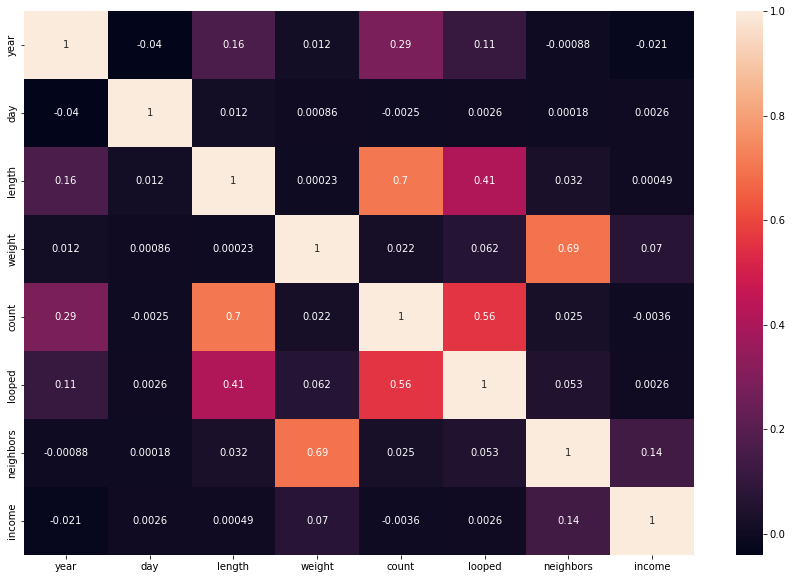

In [11]:
plt.figure(figsize=(15,10));
sns.heatmap(df.corr(), annot=True);

### Ransomware Distribution

In [12]:
to_plot = df.groupby(['label'])['address'].count().drop('white').sort_values(ascending=False)
to_plot

label
paduaCryptoWall                12390
montrealCryptoLocker            9315
princetonCerber                 9223
princetonLocky                  6625
montrealCryptXXX                2419
montrealNoobCrypt                483
montrealDMALockerv3              354
montrealDMALocker                251
montrealSamSam                    62
montrealGlobeImposter             55
montrealCryptoTorLocker2015       55
montrealGlobev3                   34
montrealGlobe                     32
montrealWannaCry                  28
montrealRazy                      13
montrealAPT                       11
paduaKeRanger                     10
montrealFlyper                     9
montrealXTPLocker                  8
montrealXLockerv5.0                7
montrealCryptConsole               7
montrealVenusLocker                7
montrealEDA2                       6
montrealJigSaw                     4
paduaJigsaw                        2
montrealSam                        1
montrealXLocker                 

### Top 10 Ransomwares

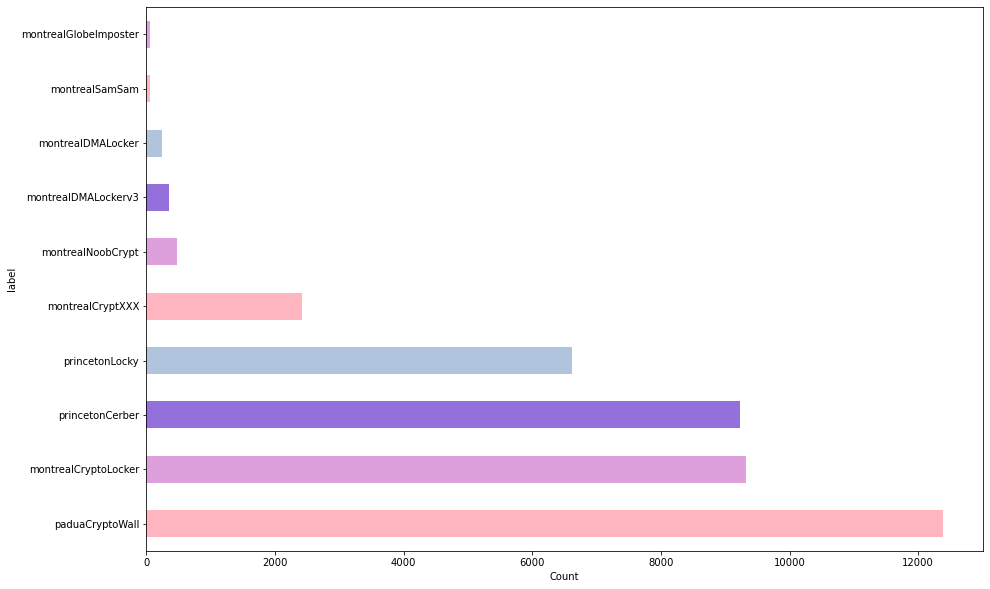

In [13]:
plt.figure(figsize=(15,10));
plt.xlabel('Count')
to_plot[:10].plot(kind='barh',color=['lightpink','plum', 'mediumpurple','lightsteelblue']);

## Categorical Data

### Changing labels to 0 and 1

In [14]:
unique_label = list(set(df.label))

d = {}

for i in unique_label:
    if i != 'white':
        d[i] = 1
    else:
        d[i] = 0
d

{'montrealCryptXXX': 1,
 'montrealRazy': 1,
 'montrealGlobe': 1,
 'montrealVenusLocker': 1,
 'montrealSamSam': 1,
 'princetonLocky': 1,
 'montrealDMALocker': 1,
 'montrealXTPLocker': 1,
 'montrealEDA2': 1,
 'montrealGlobev3': 1,
 'montrealCryptoLocker': 1,
 'montrealAPT': 1,
 'montrealCryptoTorLocker2015': 1,
 'montrealXLocker': 1,
 'montrealComradeCircle': 1,
 'white': 0,
 'montrealJigSaw': 1,
 'montrealGlobeImposter': 1,
 'montrealWannaCry': 1,
 'montrealSam': 1,
 'montrealNoobCrypt': 1,
 'paduaJigsaw': 1,
 'montrealFlyper': 1,
 'montrealXLockerv5.0': 1,
 'paduaCryptoWall': 1,
 'princetonCerber': 1,
 'montrealDMALockerv3': 1,
 'paduaKeRanger': 1,
 'montrealCryptConsole': 1}

In [15]:
df.label.replace(d, inplace=True)

<AxesSubplot:ylabel='address'>

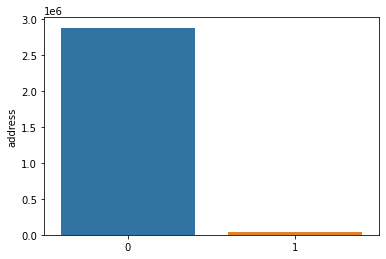

In [16]:
labels_dist = df.groupby(['label'])['address'].count()
sns.barplot(y = labels_dist, x = [0,1])

In [17]:
labels_dist # exact numbers

label
0    2875284
1      41413
Name: address, dtype: int64

### Here we changed the label type from object to int64

In [18]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2916697 entries, 0 to 2916696
Data columns (total 10 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   address    2916697 non-null  object 
 1   year       2916697 non-null  int64  
 2   day        2916697 non-null  int64  
 3   length     2916697 non-null  int64  
 4   weight     2916697 non-null  float64
 5   count      2916697 non-null  int64  
 6   looped     2916697 non-null  int64  
 7   neighbors  2916697 non-null  int64  
 8   income     2916697 non-null  float64
 9   label      2916697 non-null  int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 222.5+ MB


### Correlation matrix after adding the label

the label doesn't strongly correlate with any feature.

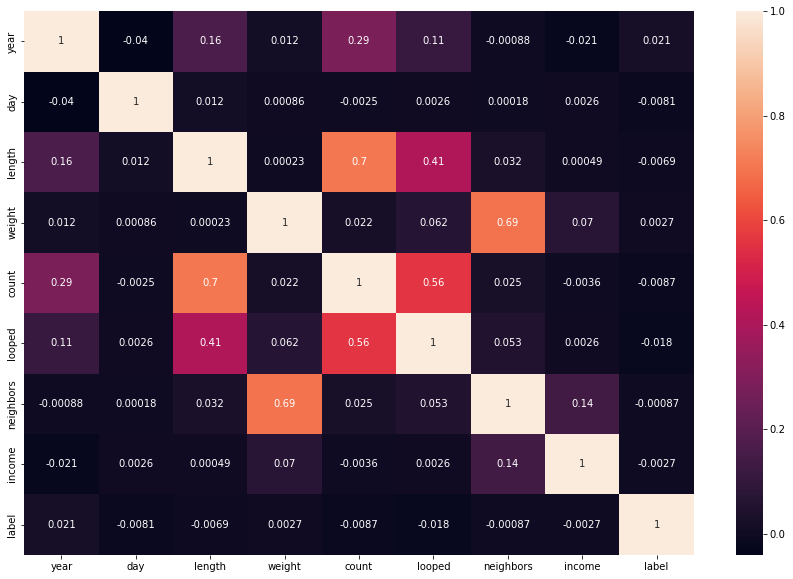

In [64]:
plt.figure(figsize=(15,10));
sns.heatmap(df.corr(), annot=True);

## Data Distribution

One point worth mentioning here is that the data is left skewed (except for year and date)

C:\Users\elaaf\AppData\Local\Temp/ipykernel_15784/274559223.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df.hist(ax = ax);


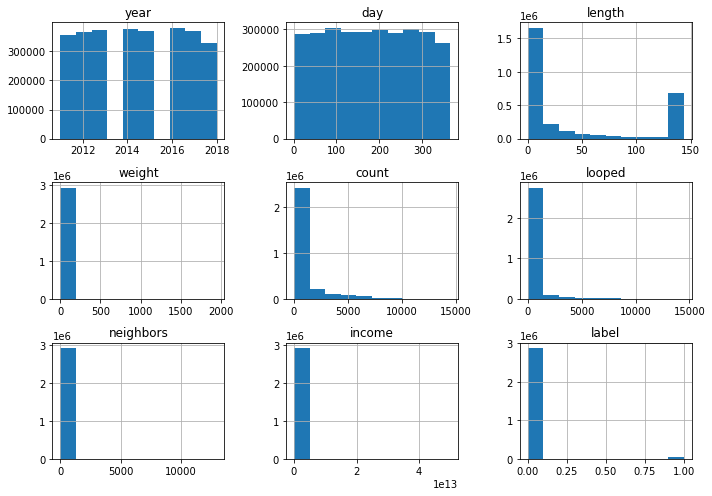

In [19]:
fig = plt.figure(figsize = (10,7));
ax = fig.gca();
df.hist(ax = ax);
plt.tight_layout();

## Explore how does the logisitic regression model behave with the initial data

### Splitting the data

In [20]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['label','address']), df['label'], test_size = 0.33, random_state=42)

### Training the model

In [23]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_prob_pred_test = lr.predict_proba(X_test)[:,1]
print(log_loss(y_test,y_prob_pred_test))

0.23910333145645832


In [26]:
# Print confusion matrix for logistic regression
logit_confusion = confusion_matrix(y_test, lr.predict(X_test))


In [27]:
logit_confusion

array([[949063,      0],
       [ 13448,      0]], dtype=int64)

In [90]:
pd.DataFrame(y_test).reset_index().groupby(['label']).count()

,index
label,
0,949063
1,13448


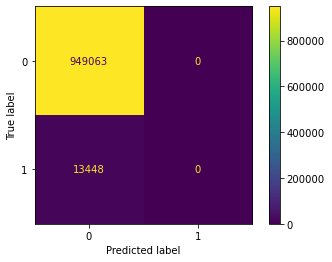

In [41]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(lr, X_test, y_test);

In [73]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_y, target_names=['0','1'], zero_division=0))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    949063
           1       0.00      0.00      0.00     13448

    accuracy                           0.99    962511
   macro avg       0.49      0.50      0.50    962511
weighted avg       0.97      0.99      0.98    962511



#### Trying dummy classifier and we noticed that we get the exact same results

In [77]:
from sklearn.dummy import DummyClassifier

dc = DummyClassifier().fit(X_train,y_train)
print(classification_report(y_test, dc.predict(X_test), target_names=['0','1'], zero_division=0))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    949063
           1       0.00      0.00      0.00     13448

    accuracy                           0.99    962511
   macro avg       0.49      0.50      0.50    962511
weighted avg       0.97      0.99      0.98    962511



# Conclusions

1. Data is highly unbalanced.
2. Data is Skewed to the left.
3. As we predicited the Logisitc Regression with the default threshold = 0.5 is no better than a dummy classifier. It only predicts the largest label correctly and ignores minority class. We have a high accuracy but it is baised for the majority class. And this is understandable because:
    1. the data is highly unbalanced.
    2. the data is not seprabable because it is left-skewed.
    3. the default threshold doesn't work for unbalanced data.

### To improve the results, we have to:
1. deal with the unbalanced and left-skewed data
2. Trying multiple classifiers 